In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import statistics

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the datasets
df = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")


In [3]:
# Let's fill out the missing data first
#TRAIN DATA
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# TEST DATA
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
test[test["Fare"].isnull()]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [6]:
# His Pclass is 3, so let's put fare of 3rd class
savg = test['Fare'][test['Pclass']==3].mean()

In [7]:
test['Fare'].fillna(savg, inplace= True)


In [8]:
# Fillling Embarked as 'S' since most of the embark are S
df['Embarked'].value_counts(sort = True, ascending = False)
df['Embarked'].fillna('S', inplace = True)

In [9]:
df[df['Age'].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


In [10]:
# We will fill the age by taking average age
age = df['Age']
average = age.sum(axis = 0, skipna = True)/len(age)
df['Age'].fillna(average, inplace = True)

age1 = test['Age']
avg = age1.sum(axis = 0, skipna = True)/len(age1)
test['Age'].fillna(avg, inplace = True)

In [11]:
df['Age']


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      23.799293
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     23.799293
18     31.000000
19     23.799293
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     23.799293
27     19.000000
28     23.799293
29     23.799293
         ...    
861    21.000000
862    48.000000
863    23.799293
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    23.799293
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    23.799293
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    23.7992

In [12]:

df['Cabin']

# As we know Cabin doesn't effect our analysis so we will remove this

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [13]:
df = df.drop('Cabin', axis = 1)
test = test.drop('Cabin',  axis = 1)


In [14]:
# Now let's check our data again
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.sample(30)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
107,108,1,3,"Moss, Mr. Albert Johan",male,23.799293,0,0,312991,7.7750,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.000000,0,0,A/4. 39886,7.8000,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,23.799293,0,0,370375,7.7500,Q
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.000000,0,0,28665,10.5000,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,23.799293,0,0,349215,7.8958,S
248,249,1,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,S
804,805,1,3,"Hedman, Mr. Oskar Arvid",male,27.000000,0,0,347089,6.9750,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.000000,1,1,C.A. 31921,26.2500,S
492,493,0,1,"Molson, Mr. Harry Markland",male,55.000000,0,0,113787,30.5000,S
808,809,0,2,"Meyer, Mr. August",male,39.000000,0,0,248723,13.0000,S


In [16]:
def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df1 = pd.DataFrame([survived,dead])
    df1.index= ['Survived','Dead']
    df1.plot(kind='bar',stacked =True, figsize=(10,6))

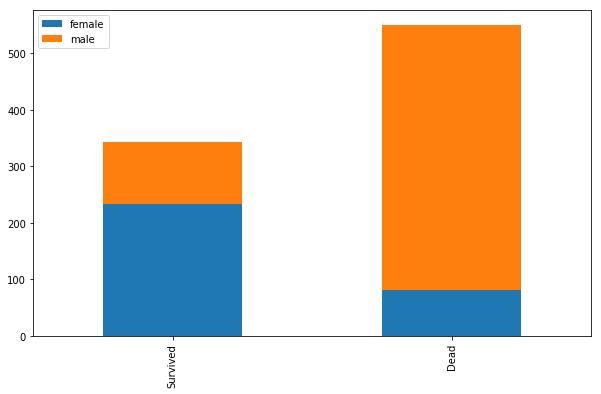

In [17]:
bar_chart('Sex')


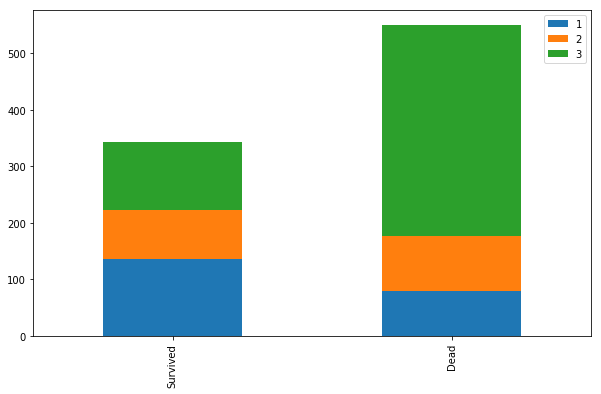

In [18]:
bar_chart('Pclass')


In [19]:
# Data preprocessing
combined = [df, test]

for i in combined:
    i['Title'] = i['Name'].str.extract(' ([A-za-z]+)\.', expand = True)
    
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Ms            1
Jonkheer      1
Countess      1
Sir           1
Mme           1
Don           1
Lady          1
Name: Title, dtype: int64

In [20]:
test['Title'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [21]:
# Change title to a number

title_map = {'Mr' : 0, 'Miss' : 2, 'Mrs' : 1, 'Master' : 3,'Dr' : 3,'Rev' : 3,'Col' :  3, 'Major' : 3, 'Mlle' : 3,
          'Capt' : 3 ,'Countess' :  3, 'Jonkheer' : 3,'Sir' : 3, 'Don' : 3, 'Mme' :  3,'Ms' :  3, 'Lady' :  3}

for i in combined:
 i['Title'] = i['Title'].map(title_map)

In [22]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [23]:

# Now let's remove the name column since its of no use to us

df.drop('Name', axis = 1, inplace = True)
test.drop('Name', axis = 1, inplace = True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0


In [24]:

# Now we will make change in sex column and refer male as 1 and female as 2
sex_map = {'male' : 1, 'female' : 2}
for i in combined:
    i['Sex'] = i['Sex'].map(sex_map)

In [25]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,2,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,2,26.0,0,0,STON/O2. 3101282,7.9250,S,2
3,4,1,1,2,35.0,1,0,113803,53.1000,S,1
4,5,0,3,1,35.0,0,0,373450,8.0500,S,0


In [26]:
# Changing the age range. Let's count 0~13 as child, 14 ~ 20 as young, 
# 21 ~ 30 as adult, 31 ~ 55 as middle-age, 51~ as senior

for i in combined:
    i.loc[i["Age"] <= 13, 'Age'] = 0,
    i.loc[(i["Age"] > 13) & (i["Age"]  <=20),'Age'] =1,
    i.loc[(i["Age"] > 20) & (i["Age"]  <=30),'Age'] =2,
    i.loc[(i["Age"] > 30) & (i["Age"]  <=55),'Age'] =3,
    i.loc[i["Age"] >  55, 'Age'] = 4

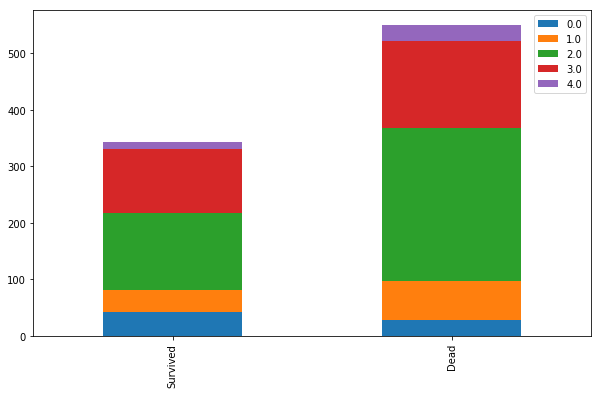

In [27]:
bar_chart('Age')


In [28]:
# Giving number to embarked 
embk_map = {'S': 0, 'C': 1, 'Q': 2}
for i in combined:
    i['Embarked'] = i['Embarked'].map(embk_map)

In [29]:
# Now we will combine parch and sibsp columns, which make it easier for us to look at data
df['FamilySize'] = df['Parch'] + df['SibSp']
test['FamilySize'] = test['Parch'] + test['SibSp']

In [30]:
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,1,0,3,1,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,2,3.0,1,0,PC 17599,71.2833,1,1,1
2,3,1,3,2,2.0,0,0,STON/O2. 3101282,7.9250,0,2,0
3,4,1,1,2,3.0,1,0,113803,53.1000,0,1,1
4,5,0,3,1,3.0,0,0,373450,8.0500,0,0,0


In [31]:
# We don't need columns like passengerid, sibsp, parch, ticket, fare
Drop = ['SibSp', 'Parch', 'Ticket']
train = df.drop(Drop, axis = 1)
test = test.drop(Drop, axis = 1)
train = train.drop('PassengerId', axis = 1)
testset = test.drop('PassengerId', axis = 1)
testset['Title'].fillna("1", inplace = True)

In [32]:
# Now let's begin making our models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = train.drop(['Survived'], axis = 1)
y = train['Survived']               

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [33]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((668, 7), (223, 7), (668,), (223,))

In [34]:
# Now let's apply first algorithm of KNN
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

knn = KNeighborsClassifier(n_neighbors = 10)
scoring = 'accuracy'
score = cross_val_score(knn, x_train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring)
print('K-Fold score :', score)
print('Average accuracy : ', round(np.mean(score)*100,2))

K-Fold score : [0.74626866 0.80597015 0.70149254 0.8358209  0.79104478 0.7761194
 0.67164179 0.80597015 0.65151515 0.6969697 ]
Average accuracy :  74.83


In [35]:
# Our second algorithm
dtc = DecisionTreeClassifier()
DecisionTreeClassifier(class_weight = None, criterion = 'gini', max_depth = None, max_features = None,
                     max_leaf_nodes = None, min_impurity_decrease = 0.0, min_impurity_split= None,
                     min_samples_leaf = 1, min_samples_split = 2, min_weight_fraction_leaf = 0.0,
                     presort= False, random_state = None, splitter = 'best')
score = cross_val_score(dtc, x_train, y_train, cv = 10, n_jobs = 1, scoring = scoring)
print("The value of score : ",score)
print("Average accuracy : ", round(np.mean(score)*100,2))

The value of score :  [0.80882353 0.75       0.79411765 0.86567164 0.80597015 0.74242424
 0.8030303  0.84848485 0.75757576 0.83333333]
Average accuracy :  80.09


In [36]:
# Our third algoithm
rfc = RandomForestClassifier(n_estimators = 20, random_state = 13)
score = cross_val_score(rfc, x_train, y_train, cv = 10, n_jobs = 1, scoring = scoring)
print("The value of score : ", score)
print("Average accuracy : ", round(np.mean(score)*100, 2))

The value of score :  [0.82352941 0.72058824 0.79411765 0.7761194  0.85074627 0.75757576
 0.81818182 0.83333333 0.81818182 0.87878788]
Average accuracy :  80.71


In [37]:
# Our fourth algorithm
svm = SVC()
score = cross_val_score(svm, x_train, y_train, cv = 10, n_jobs = 1, scoring = scoring)
print("The value of score : ", score)
print("Average accuracy : ", round(np.mean(score)*100, 2))

The value of score :  [0.83823529 0.72058824 0.79411765 0.89552239 0.7761194  0.68181818
 0.74242424 0.77272727 0.71212121 0.89393939]
Average accuracy :  78.28


In [38]:
# Our fifth algorithm
lrc = LogisticRegression()
score = cross_val_score(lrc, x_train, y_train, cv = 10, n_jobs = 1, scoring = scoring)
print("The value of score :", score)
print("Average acuracy :", round(np.mean(score)*100, 2))

The value of score : [0.91176471 0.69117647 0.86764706 0.89552239 0.76119403 0.71212121
 0.6969697  0.77272727 0.8030303  0.90909091]
Average acuracy : 80.21


In [39]:
# As we can see Random Forest algorithm has highest accuracy so we will use it for our prediction
rfc = RandomForestClassifier(n_estimators = 20, random_state = 13)
rfc.fit(x,y)
score = cross_val_score(rfc, x, y, cv = 10, n_jobs = 1, scoring = scoring)
print("The value of score : ", score)
print("Average accuracy : ", round(np.mean(score)*100, 2))

The value of score :  [0.75555556 0.81111111 0.73033708 0.85393258 0.86516854 0.86516854
 0.82022472 0.73033708 0.82022472 0.86363636]
Average accuracy :  81.16


In [40]:
# Now let's predict the results
result = rfc.predict(testset)

result[0:10,]

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [41]:

import collections, numpy

collections.Counter(result)

submission = pd.DataFrame({
         "PassengerId" : test["PassengerId"],
         "Survived" : result
})

submission.to_csv('submission.csv', index= False)